In [1]:
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [3]:
# Read in the data
df = pd.read_csv('/Users/shahadaleissa/hyper_code/Dataset/cleaned_hypertension_data.csv')

In [4]:
def splitting_data(df, sampling):
    if sampling == 'none':
        X = df.drop(['Class'], axis=1)
        y = df['Class']
        return X, y
    elif sampling == 'SMOTEENN':
        smote_enn = SMOTEENN(random_state=0)
        X = df.drop(['Class'], axis=1)
        y = df['Class']
        X_resampled, y_resampled = smote_enn.fit_resample(X, y)
        return X_resampled, y_resampled
    elif sampling == 'SMOTE':
        smote = SMOTE(random_state=0)
        X = df.drop(['Class'], axis=1)
        y = df['Class']
        X_resampled, y_resampled = smote.fit_resample(X, y)
        return X_resampled, y_resampled
    elif sampling == 'under':
        rus = RandomUnderSampler(random_state=0)
        X = df.drop(['Class'], axis=1)
        y = df['Class']
        X_resampled, y_resampled = rus.fit_resample(X, y)
        return X_resampled, y_resampled

In [5]:
def training_using_diff_lr(X_train, y_train, X_test, y_test):
    learning_rate_range = np.arange(0.01, 1, 0.05)
    test_XG = [] 
    train_XG = []
    best_classifier = None
    best_accuracy = 0

    for lr in learning_rate_range:
        xgb_classifier = xgb.XGBClassifier(eta=lr)
        xgb_classifier.fit(X_train, y_train)
        train_accuracy = xgb_classifier.score(X_train, y_train)
        test_accuracy = xgb_classifier.score(X_test, y_test)
        train_XG.append(train_accuracy)
        test_XG.append(test_accuracy)

        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_classifier = xgb_classifier

    fig = plt.figure(figsize=(10, 7))
    plt.plot(learning_rate_range, train_XG, c='orange', label='Train')
    plt.plot(learning_rate_range, test_XG, c='m', label='Test')
    plt.xlabel('Learning rate')
    plt.xticks(learning_rate_range)
    plt.ylabel('Accuracy score')
    plt.ylim(0.6, 1)
    plt.legend(prop={'size': 12}, loc=3)
    plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)
    plt.show()

    # Print classification report
    if best_classifier:
        y_pred = best_classifier.predict(X_test)
        print("Classification Report of the Best Classifier:")
        print(classification_report(y_test, y_pred))

    return best_classifier, test_XG, train_XG



<h1> XGboost using original data </h1>

In [6]:
#splitting the data
X, y = splitting_data(df, 'none')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


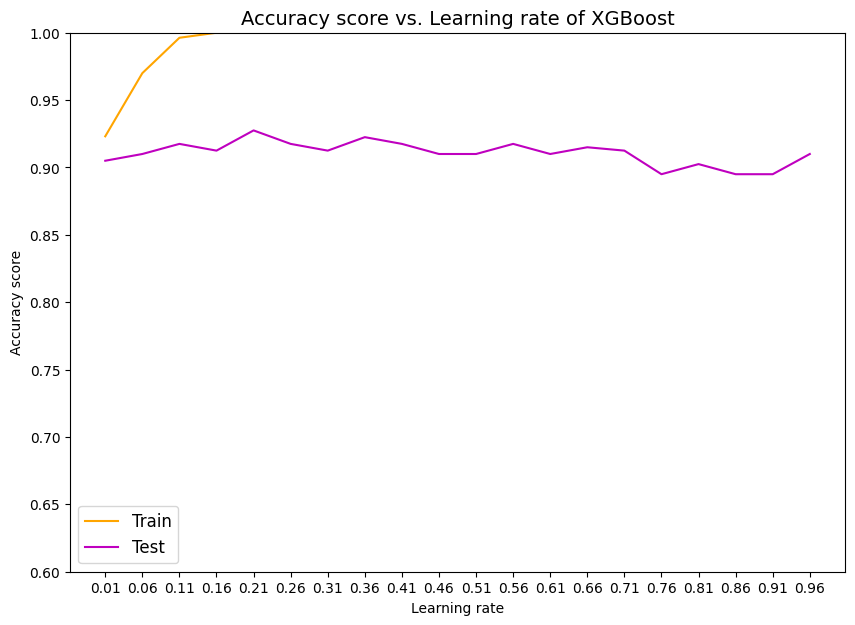

Classification Report of the Best Classifier:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       191
           1       0.92      0.94      0.93       209

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [7]:
model, train, test = training_using_diff_lr(X_train, y_train, X_test, y_test)

<h1> XGboost using SMOTE </h1>

In [12]:
X, y= splitting_data(df, 'SMOTE')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

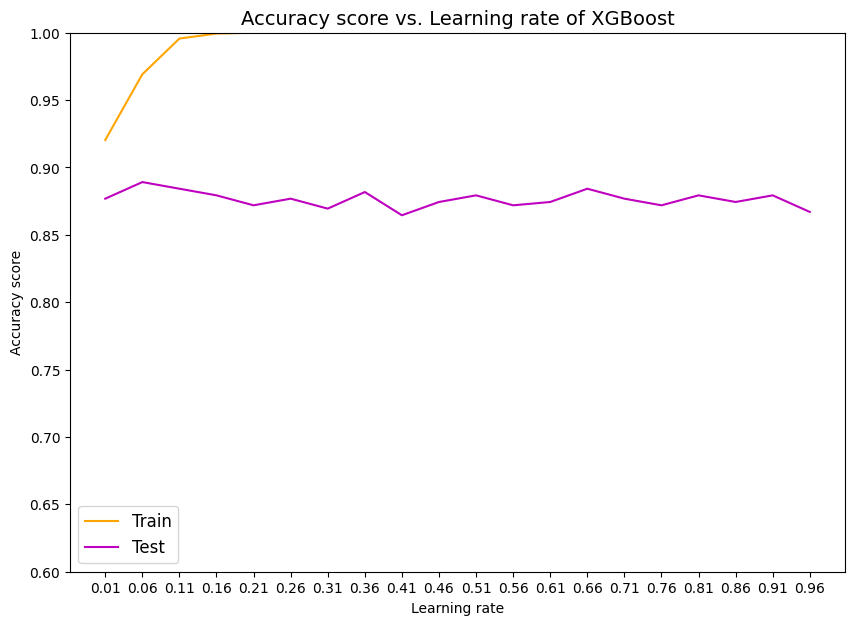

Classification Report of the Best Classifier:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       211
           1       0.90      0.87      0.88       195

    accuracy                           0.89       406
   macro avg       0.89      0.89      0.89       406
weighted avg       0.89      0.89      0.89       406



In [13]:
model1, train1, test1 = training_using_diff_lr(X_train, y_train, X_test, y_test)

<h1> XGboost using SMOTEENN

In [14]:
X, y= splitting_data(df, 'SMOTEENN')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

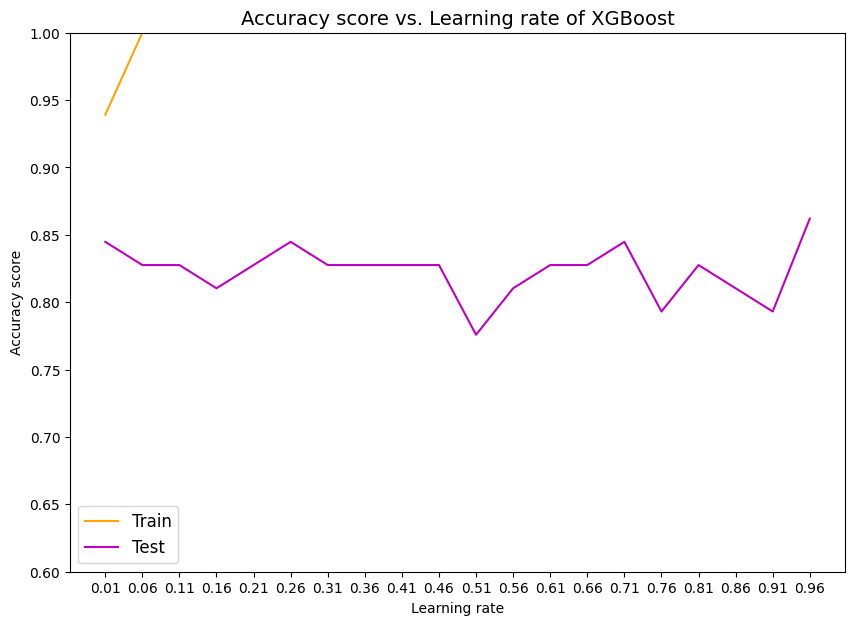

Classification Report of the Best Classifier:
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        25
           1       0.86      0.91      0.88        33

    accuracy                           0.86        58
   macro avg       0.86      0.85      0.86        58
weighted avg       0.86      0.86      0.86        58



In [15]:
model2, train2, test2 = training_using_diff_lr(X_train, y_train, X_test, y_test)

<h1> XGboost using Random under sampling </h1>

In [16]:
X, y= splitting_data(df, 'under')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

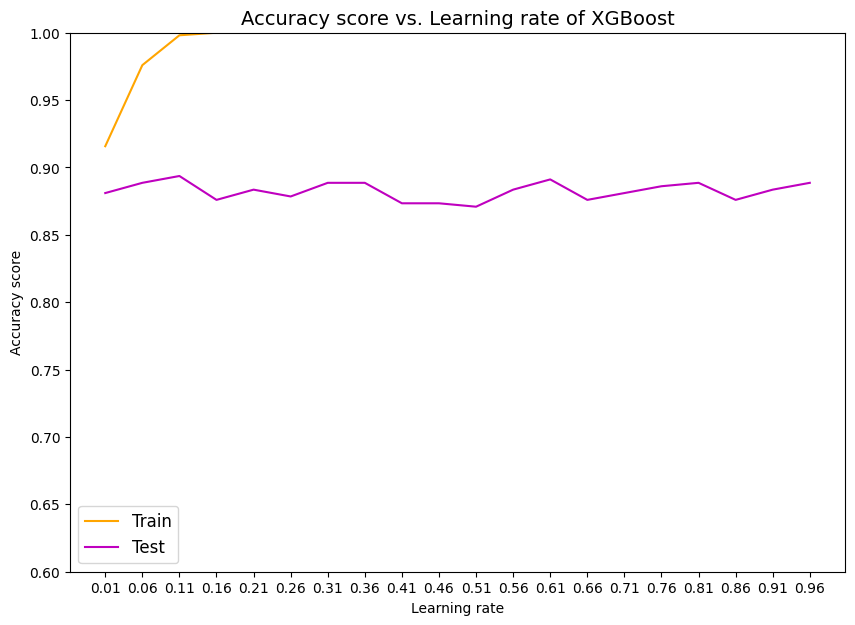

Classification Report of the Best Classifier:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       200
           1       0.90      0.88      0.89       195

    accuracy                           0.89       395
   macro avg       0.89      0.89      0.89       395
weighted avg       0.89      0.89      0.89       395



In [17]:
model3, train3, test3 = training_using_diff_lr(X_train, y_train, X_test, y_test)

<h2> Findings </h2>

<h3> Original data performed much better therefore more optimization will be done on the original data </h3>

<h2> Hyperparameter optimization using original data </h2>